# Iris EDA
> OpenDate:2021-10-10
> Content: EDA
> Author:柴犬陪唸書
> DataSet:Iris
# 探索式資料基礎分析
- package
  * matplotlib
  * numpy
  * sklearn
    [sklearn-iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=iris#sklearn.datasets.load_iris)
  * pandas
- Box Plot
- Scatter Plot
- Histogram Plot

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# 從sklearn拿iris dataset
from sklearn.datasets import load_iris
# Scatter Plot 標準化
from sklearn import preprocessing
iris = load_iris()
%matplotlib inline


In [14]:
type(iris)

sklearn.utils.Bunch

In [15]:
type(iris.data)

numpy.ndarray

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# 進行添加Class Label,(50,50,50)分配給Setosa,Versicolor,Virginica
iris_df["species"] ="temp"
# 先列後行
iris_df.loc[:49,"species"] ="Setosa"
iris_df.loc[50:99,"species"] = "Versicolor"
iris_df.loc[100:149,"species"] = "Virginica"
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [19]:
# 依據不同class計算數量
iris_df.groupby("species").size()

species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [20]:
# 查看資料的狀態
iris_df["species"].describe()

count        150
unique         3
top       Setosa
freq          50
Name: species, dtype: object

In [21]:
print(iris_df.head(1))
# 第一欄
print(iris_df.iloc[:,0].describe())
# 第二欄
print(iris_df.iloc[:,1].describe())
# 第三欄
print(iris_df.iloc[:,2].describe())
# 第四欄
print(iris_df.iloc[:,3].describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   

  species  
0  Setosa  
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64
count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64
count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64
count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64


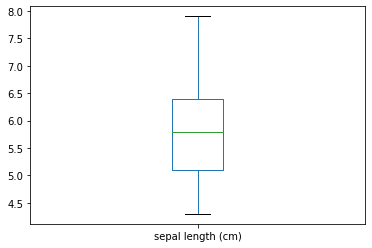

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
species              150
dtype: int64
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.05              4.600             2.345                1.3               0.2
0.25              5.100             2.800                1.6               0.3
0.75              6.400             3.300                5.1               1.8
0.95              7.255             3.800                6.1               2.3


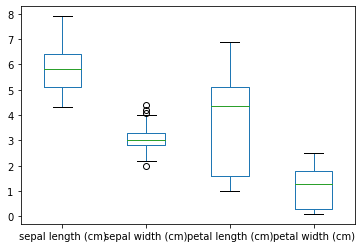

In [22]:
# Quantile Box Plot
# 單獨畫第一欄相關資料
print(iris_df.iloc[:,0].describe())
iris_df.iloc[:,0].plot(kind="box")
plt.show()
# 畫全部的Box Plot
column_index = iris_df.columns
print(iris_df[column_index].count())
q = [0.05,0.25,0.75,0.95]
print(iris_df[column_index].quantile(q))
iris_df[column_index].plot(kind="box")
plt.show()

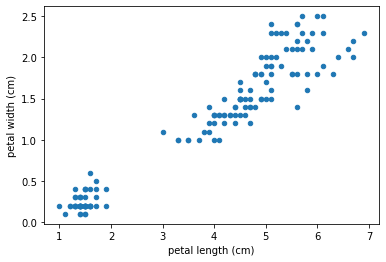

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

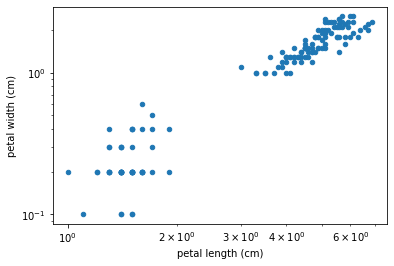

In [23]:
# Scatter Plot
iris_df.plot(x = "petal length (cm)", y= "petal width (cm)",kind="scatter")
plt.show()
# 代入log
iris_df.plot(x = "petal length (cm)", y= "petal width (cm)",kind="scatter",logx = True, logy=True)

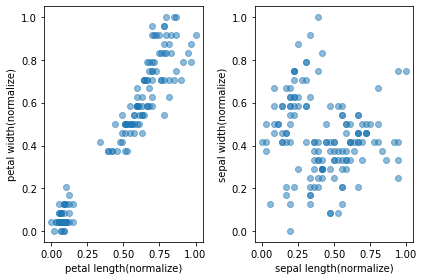

In [27]:
# Scatter Plot All Data
column_index = iris_df.columns
column_index_array = column_index[0:4]
min_max_scaler = preprocessing.MinMaxScaler()  
iris_df_nor = min_max_scaler.fit_transform(iris_df.iloc[:,0:4])
iris_df_nor = pd.DataFrame(iris_df_nor,columns=column_index_array)
plt.subplot(1,2,1)
plt.scatter(x= iris_df_nor.loc[:,"petal length (cm)"],y=iris_df_nor.loc[:,"petal width (cm)"],alpha=0.5)
plt.xlabel("petal length(normalize)")
plt.ylabel("petal width(normalize)")
plt.subplot(1,2,2)
plt.scatter(x= iris_df_nor.loc[:,"sepal length (cm)"],y=iris_df_nor.loc[:,"sepal width (cm)"],alpha=0.5)
plt.xlabel("sepal length(normalize)")
plt.ylabel("sepal width(normalize)")
plt.tight_layout()
plt.show()

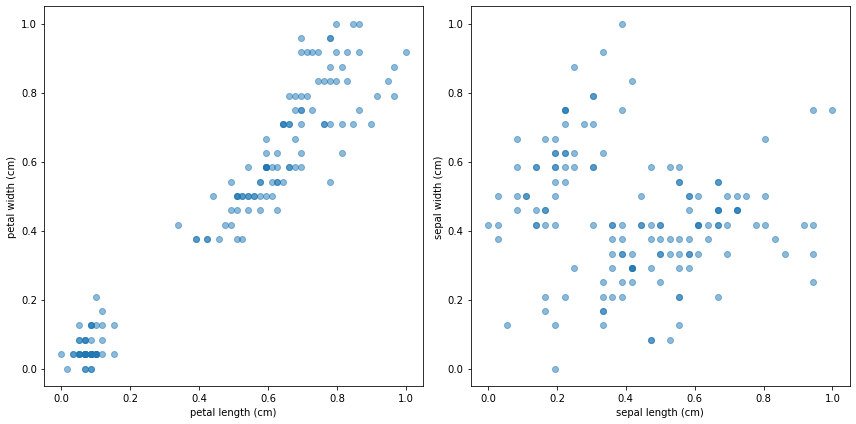

In [ ]:
# Scatter Plot All Data With Size
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(x= iris_df_nor.loc[:,"petal length (cm)"],y=iris_df_nor.loc[:,"petal width (cm)"],alpha=0.5)
ax1.set_xlabel("petal length (cm)")
ax1.set_ylabel("petal width (cm)")
ax2.scatter(x= iris_df_nor.loc[:,"sepal length (cm)"],y=iris_df_nor.loc[:,"sepal width (cm)"],alpha=0.5)
ax2.set_xlabel("sepal length (cm)")
ax2.set_ylabel("sepal width (cm)")
plt.tight_layout()
plt.show()

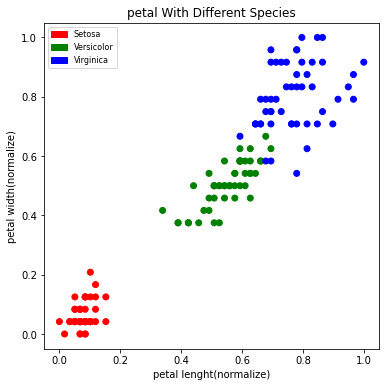

In [30]:
# Scatter Plot Sepal With Species
data_label = iris_df.loc[:,"species"]
iris_df_nor["species"] = data_label
fig, ax = plt.subplots()
colors = {"Setosa":"red","Versicolor":"green","Virginica":"blue"}
ax.scatter(iris_df_nor["petal length (cm)"],iris_df_nor["petal width (cm)"],c=iris_df_nor['species'].map(colors))
plt.xlabel("petal lenght(normalize)")
plt.ylabel("petal width(normalize)")
Setosa_color = mpatches.Patch(color="red",label="Setosa")
Versicolor_color = mpatches.Patch(color="green",label="Versicolor")
Virginica_color = mpatches.Patch(color="blue",label="Virginica")
plt.legend(handles=[Setosa_color,Versicolor_color,Virginica_color],fontsize=8)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.title("petal With Different Species")
plt.savefig("EDA_Scatter_Petal.png",dpi=300)
plt.show()

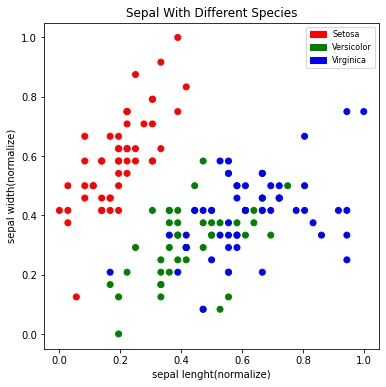

In [29]:
# Scatter Plot Sepal With Species
data_label = iris_df.loc[:,"species"]
iris_df_nor["species"] = data_label
fig, ax = plt.subplots()
colors = {"Setosa":"red","Versicolor":"green","Virginica":"blue"}
ax.scatter(iris_df_nor["sepal length (cm)"],iris_df_nor["sepal width (cm)"],c=iris_df_nor['species'].map(colors))
plt.xlabel("sepal lenght(normalize)")
plt.ylabel("sepal width(normalize)")
Setosa_color = mpatches.Patch(color="red",label="Setosa")
Versicolor_color = mpatches.Patch(color="green",label="Versicolor")
Virginica_color = mpatches.Patch(color="blue",label="Virginica")
plt.legend(handles=[Setosa_color,Versicolor_color,Virginica_color],fontsize=8)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.title("Sepal With Different Species")
plt.savefig("EDA_Scatter_Sepal.png",dpi=300)
plt.show()

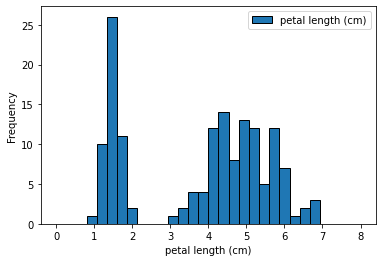

In [ ]:
# Histogram Plot
iris_df.plot(y="petal length (cm)", kind="hist",bins=30, range=(0,8),edgecolor="black")
plt.xlabel("petal length (cm)")
plt.show()

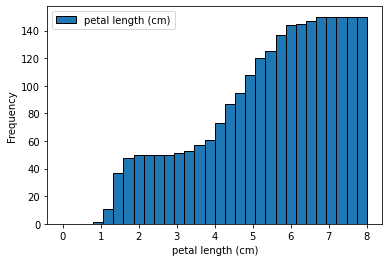

In [ ]:
# Histogram Plot With Cumulative
iris_df.plot(y="petal length (cm)",kind="hist", bins = 30, range=(0,8), cumulative=True, edgecolor="black")
plt.xlabel("petal length (cm)")
plt.show() 

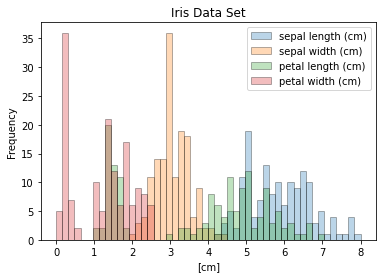

<Figure size 3240x2160 with 0 Axes>

In [ ]:
# Histogram Plot All Data
iris_df.plot(kind="hist", bins=50, range=(0,8), alpha=0.3, edgecolor="black")
plt.title("Iris Data Set")
plt.xlabel("[cm]")
plt.figure(figsize=(18,12), dpi=180)
plt.show()

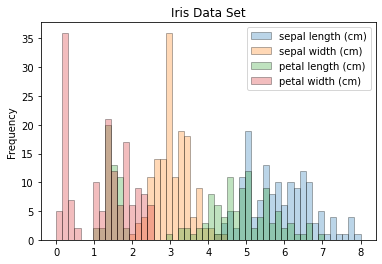

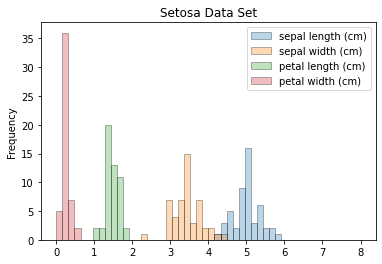

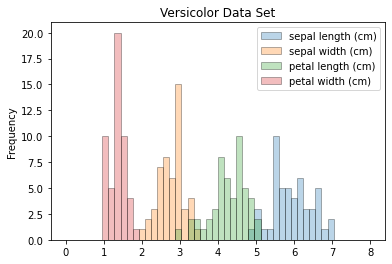

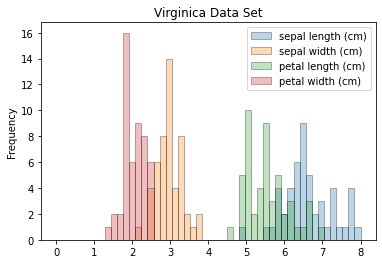

In [ ]:
# Histogram Plot All Data
# Filter by Species
indices = iris_df["species"] == "Setosa"
Setosa = iris_df.loc[indices,:]
indices = iris_df["species"] == "Versicolor"
Versicolor = iris_df.loc[indices,:]
indices = iris_df["species"] == "Virginica"
Virginica =iris_df.loc[indices,:]
# All Data
iris_df.plot(kind="hist", bins=50, range=(0,8), alpha=0.3, edgecolor="black")
plt.title("Iris Data Set")
plt.show()
# Select Setosa Data Set
Setosa.plot(kind="hist", bins=50, range=(0,8), alpha=0.3, edgecolor="black")
plt.title("Setosa Data Set")
plt.show()
# Select Versicolor Data Set
Versicolor.plot(kind="hist",bins=50, range=(0,8), alpha=0.3, edgecolor="black")
plt.title("Versicolor Data Set")
# Virginica Data Set
Virginica.plot(kind="hist",bins=50, range=(0,8), alpha=0.3, edgecolor="black")
plt.title("Virginica Data Set")
plt.show()

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


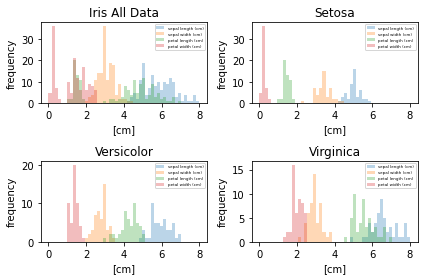

In [ ]:
# Histogram Plot by Subplot
column_index = list(iris_df.columns)
print(iris_df.iloc[:,:].describe())
plt_des = dict(alpha=0.3, bins=50, range=(0,8))
plt.subplot(2,2,1)
for i in range(0,len(column_index)-1):
    n,bins,patches = plt.hist(iris_df.loc[:,column_index[i]],label=column_index[i], **plt_des)
plt.gca().set(title="Iris All Data",xlabel="[cm]",ylabel="frequency")
plt.legend(fontsize=4)
plt.subplot(2,2,2)
data_set = "Setosa"
for i in range(0,len(column_index)-1):
    n,bins,patches = plt.hist(iris_df.loc[iris_df.species==data_set,column_index[i]], label=column_index[i],**plt_des)
plt.gca().set(title=data_set,xlabel="[cm]",ylabel="frequency")
plt.legend(fontsize=4)
plt.subplot(2,2,3)
data_set = "Versicolor"
for i in range(0,len(column_index)-1):
    n,bins,patches = plt.hist(iris_df.loc[iris_df.species==data_set,column_index[i]], label=column_index[i],**plt_des)
plt.gca().set(title=data_set,xlabel="[cm]",ylabel="frequency")
plt.legend(fontsize=4)
plt.subplot(2,2,4)
data_set = "Virginica"
for i in range(0,len(column_index)-1):
    n,bins,patches = plt.hist(iris_df.loc[iris_df.species==data_set,column_index[i]], label=column_index[i],**plt_des)
plt.gca().set(title=data_set,xlabel="[cm]",ylabel="frequency")
plt.legend(fontsize=4)
plt.tight_layout()
plt.savefig('EDA_histogram.png',dpi=300)
plt.show()